In [10]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Yannis Laaroussi - Fabio Palmisano - Vincent Roh - Alexi Semiz -*-
# -*- date : 2023-11-15 -*-
# -*- Last revision: 2023-11-15 -*-
# -*- python version : 3.12.0 -*-
# -*- Description: Main Containing all the meaningfull results -*-

In [11]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import powerlaw
from statsmodels.stats import diagnostic
from datetime import datetime
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%reload_ext autoreload

In [13]:
#import functions
from read.read_functions import *
from read.pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

---
# Download and save datas
### Data paths

In [14]:
#Data paths for raw files
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'
rate_beer_ratings = rate_beer_path + 'ratings.txt'
rate_beer_reviews = rate_beer_path + 'reviews.txt'

contries_path = '../datas/countries/countries.csv'


In [15]:
#data paths for pickle files
beer_advocate_path_pickle = '../datas/BeerAdvocate/pickles/df_advocate_'
matched_beer_data_path_pickle = '../datas/matched_beer_data/pickles/df_matched_beer_'
rate_beer_path_pickle = '../datas/RateBeer/pickles/df_rate_beer_'

advocate_beers_path_pickle = beer_advocate_path_pickle + 'beers.pkl'
advovate_breweries_path_pickle = beer_advocate_path_pickle + 'breweries.pkl'
advocate_ratings_path_pickle = beer_advocate_path_pickle + 'ratings.pkl'
advocate_reviews_path_pickle = beer_advocate_path_pickle + 'reviews.pkl'
advocate_users_path_pickle = beer_advocate_path_pickle + 'users.pkl'

matched_beer_beers_pickle = matched_beer_data_path_pickle + 'beers.pkl'
matched_beer_breweries_pickle = matched_beer_data_path_pickle + 'breweries.pkl'
matched_beer_ratings_ba_pickle = matched_beer_data_path_pickle + 'ratings_ba.pkl'
matched_beer_ratings_rb_pickle = matched_beer_data_path_pickle + 'ratings_rb.pkl'
matched_beer_ratings_pickle = matched_beer_data_path_pickle + 'ratings.pkl'
matched_beer_users_approx_pickle = matched_beer_data_path_pickle + 'users_approx.pkl'
matched_beer_users_pickle = matched_beer_data_path_pickle + 'users.csv'

rate_beer_beers_pickle = rate_beer_path_pickle + 'beers.pkl'
rate_beer_breweries_pickle = rate_beer_path_pickle + 'breweries.pkl'
rate_beer_users_pickle = rate_beer_path_pickle + 'users.pkl'
rate_beer_ratings_pickle = rate_beer_path_pickle + 'ratings.pkl'
rate_beer_reviews_pickle = rate_beer_path_pickle + 'reviews.pkl'

In [16]:
#Define list of datas for each website
datas_matched_beer_names = [
    'df_matched_beer_beers',
    'df_matched_beer_breweries',
    'df_matched_beer_ratings_ba',
    'df_matched_beer_ratings_rb',
    'df_matched_beer_ratings',
    'df_matched_beer_users_approx',
    'df_matched_beer_users'
    ]
datas_advocate_names = [
    'df_advocate_beers',
    'df_advocate_breweries',
    'df_advocate_ratings',
    'df_advocate_reviews',
    'df_advocate_users'
    ]
datas_rate_beer_names = [
    'df_rate_beer_beers',
    'df_rate_beer_breweries',
    'df_rate_beer_users',
    'df_rate_beer_ratings',
    'df_rate_beer_reviews'
    ]

## import datas
### Raw Format
$\color{Red}{\text{Attention}}$ : Run the celluls in this section only if the datasets stored as pickle are not available.

In [ ]:
#import datas from Advovate Beer
df_advocate_beers = pd.read_csv(advocate_beers_path, sep=',')
df_advocate_breweries = pd.read_csv(advovate_breweries_path, sep=',')
df_advocate_ratings = read_txt(advocate_ratings_path)
df_advocate_reviews = read_txt(advocate_reviews_path)
df_advocate_users = pd.read_csv(advocate_users_path, sep=',')

In [ ]:
#import datas from Matched Beer
df_matched_beer_beers = pd.read_csv(matched_beer_beers, sep=',')
df_matched_beer_breweries = pd.read_csv(matched_beer_breweries, sep=',')
df_matched_beer_ratings_ba = read_txt(matched_beer_ratings_ba)
df_matched_beer_ratings_rb = read_txt(matched_beer_ratings_rb)
df_matched_beer_ratings = pd.read_csv(matched_beer_ratings, sep=',')
df_matched_beer_users_approx = pd.read_csv(matched_beer_users_approx)
df_matched_beer_users = pd.read_csv(matched_beer_users)

In [ ]:
#import datas from Rate Beer
df_rate_beer_beers = pd.read_csv(rate_beer_beers, sep=',')
df_rate_beer_breweries = pd.read_csv(rate_beer_breweries, sep=',')
df_rate_beer_users = pd.read_csv(rate_beer_users, sep=',')
df_rate_beer_ratings = read_txt(rate_beer_ratings)
df_rate_beer_reviews = read_txt(rate_beer_reviews)

### Pickle Format

In [17]:
#import raw data sets
df_matched_beer_beers, df_matched_beer_breweries, df_matched_beer_ratings_ba, df_matched_beer_ratings_rb, df_matched_beer_ratings, df_matched_beer_users_approx, df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_advocate_beers, df_advocate_breweries, df_advocate_ratings, df_advocate_reviews, df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_reviews...


## Store dataFrame (Pickle format)
Use this section to store the datasets in pickle (normally done once)

In [ ]:
#define list of datas for each website
datas_rate_beer = [df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews]
datas_matched_beer = [df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users]
datas_advocate_beer = [df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users]

In [ ]:
#Saving datas
save_datas('RateBeer', datas_rate_beer,datas_rate_beer_names)
save_datas('matched_beer_data', datas_matched_beer,datas_matched_beer_names)
save_datas('BeerAdvocate', datas_advocate_beer,datas_advocate_names)

---
# Initial data analysis
## 0. Preprocessing datasets

In [18]:
#import cleaning functions
from cleaning_functions.matched_beer import *
from cleaning_functions.rate_beer import *
from cleaning_functions.advocate import *

In [19]:
# Clean used datasets
df_matched_beer_users = clean_mb_users(df_matched_beer_users)
df_advocate_users = clean_advocate_users(df_advocate_users)
df_rate_beer_users = clean_rb_users(df_rate_beer_users)
df_advocate_ratings = clean_advocate_ratings(df_advocate_ratings)
df_rate_beer_ratings = clean_rb_ratings(df_rate_beer_ratings)

*  A first merge is performed on user's datasets in order to have a single dataFrame. 
* Another merge is performed on ratings (for both Advocate and Rate Beer to obtain a single dataFrame)

In [20]:
df_all_users = create_all_users(df_matched_beer_users,df_advocate_users,df_rate_beer_users)
df_ratings_stats = create_ratings_stat(df_matched_beer_ratings,df_advocate_ratings,df_rate_beer_ratings)

Loading the dataframe in pickle format from  ../datas/results/
Loading the dataframe in pickle format from  ../datas/results/


## 1. Diving in the datas
### a. Distribution of the number of ratings per user

In [21]:
df_ratings_stats.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,ba_user_name,user_id,appearance,aroma,palate,taste,overall,rating,rb_user_name,location,joined,year
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 10:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
1,O-Ho-Ho,120824,Otley Brewing Company,13092,Extra Special / Strong Bitter (ESB),5.0,2015-11-14 11:00:00,nmann08,nmann08.184925,4.00,3.50,3.75,3.50,3.50,3.56,nmann08,"United States, Washington",2008-01-07 11:00:00,2015
2,Ola Dubh Special Reserve 18,47581,Harviestoun Brewery Ltd.,323,Old Ale,8.0,2011-11-18 11:00:00,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,4.50,nmann08,"United States, Washington",2008-01-07 11:00:00,2011
3,Ola Dubh Special Reserve 21,93113,Harviestoun Brewery Ltd.,323,Old Ale,10.5,2013-05-03 10:00:00,nmann08,nmann08.184925,NaN,NaN,NaN,NaN,NaN,3.75,nmann08,"United States, Washington",2008-01-07 11:00:00,2013
4,Old Engine Oil Black Ale,875,Harviestoun Brewery Ltd.,323,English Porter,6.0,2015-01-24 11:00:00,nmann08,nmann08.184925,4.00,3.50,3.75,4.00,3.75,3.81,nmann08,"United States, Washington",2008-01-07 11:00:00,2015


In [35]:
ratings_per_user = pd.DataFrame({'nbr_ratings':df_ratings_stats.groupby('user_id')['user_id'].count()})

In [41]:
ratings_per_user.describe()

,nbr_ratings
count,220796.000000
mean,66.594748
std,429.733452
min,1.000000
25%,1.000000
50%,3.000000
75%,13.000000
max,43251.000000


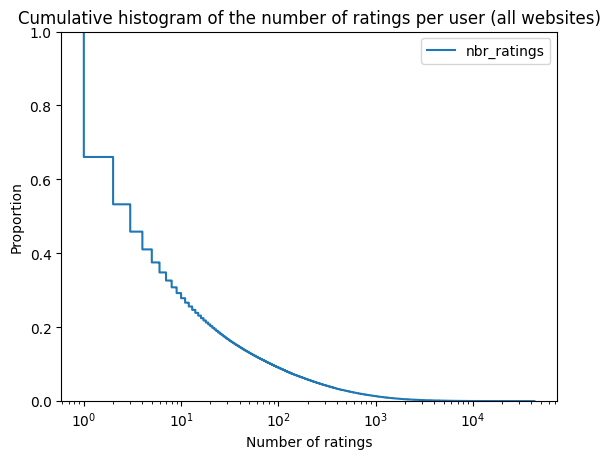

In [52]:
sns.ecdfplot(ratings_per_user, label="nbr_ratings", complementary=True)
plt.title('Cumulative histogram of the number of ratings per user (all websites)')
plt.xlabel('Number of ratings')
plt.ylabel('Proportion')
plt.semilogx()
plt.show()

Calculating best minimal value for power law fit
alpha = 2.5523325001849297
R = 5.228504679102393
p = 1.7088651002269477e-07


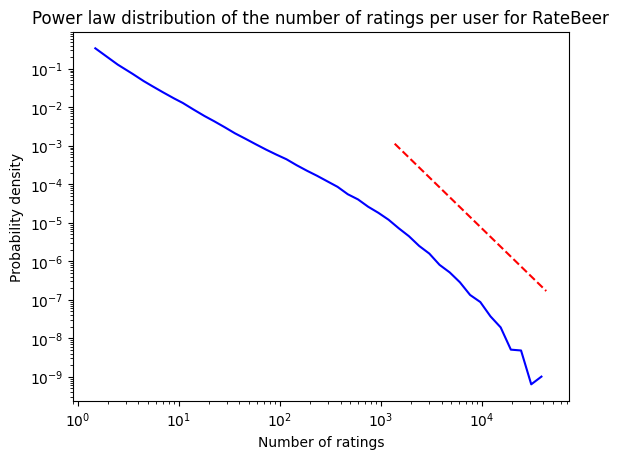

In [64]:
fit = powerlaw.Fit(ratings_per_user['nbr_ratings'].values)

print('alpha =', fit.alpha)

# R: loglikelihood ratio of the two distributions if positive the first distribution is better
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('R =', R)
print('p =', p)

powerlaw.plot_pdf(ratings_per_user['nbr_ratings'].values, color='b')
fit.power_law.plot_pdf(color='r', linestyle='--')

plt.title('Power law distribution of the number of ratings per user (all websites)')
plt.xlabel('Number of ratings')
plt.ylabel('Probability density')
plt.show()

In [68]:
from fitter import Fitter, get_common_distributions, get_distributions

ModuleNotFoundError: No module named 'pkg_resources'